In [159]:
import pandas as pd
hr = pd.read_csv('HR.csv')
col_names = hr.columns.tolist()
print("Column names:")
print(col_names)

print("\nSample data:")
hr.head()


Column names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

Sample data:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [160]:
hr=hr.rename(columns = {'sales':'department'})


In [161]:
hr.dtypes


satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [162]:
hr.isnull().any()


satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

In [163]:
hr.shape


(14999, 10)

In [164]:
hr.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [165]:
hr['department'].unique()


array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [166]:
import numpy as np
hr['department']=np.where(hr['department'] =='support', 'technical', hr['department'])
hr['department']=np.where(hr['department'] =='IT', 'technical', hr['department'])

In [167]:
print(hr['department'].unique())


['sales' 'accounting' 'hr' 'technical' 'management' 'product_mng'
 'marketing' 'RandD']


In [168]:
hr['left'].value_counts()


0    11428
1     3571
Name: left, dtype: int64

In [169]:
hr.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [170]:
hr.groupby('department').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,,,
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
technical,0.613687,0.720976,3.839054,201.813795,3.416127,0.144106,0.246924,0.008258


In [171]:
hr.groupby('salary').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


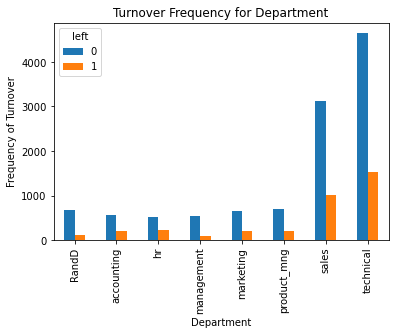

In [172]:

%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(hr.department,hr.left).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

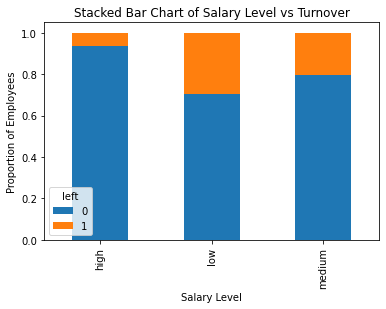

In [173]:
table=pd.crosstab(hr.salary, hr.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

In [174]:
pd.crosstab(hr.department, hr.left)


left,0,1
department,,
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
technical,4651,1525


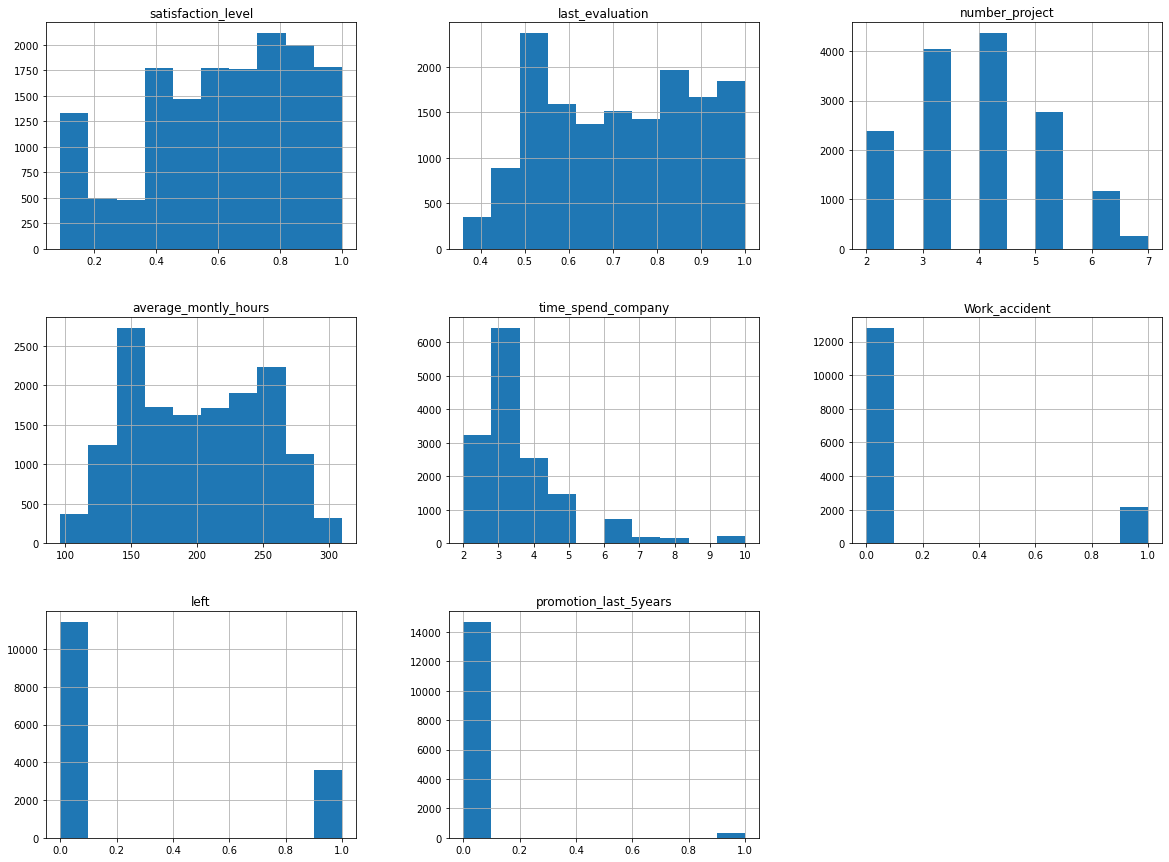

In [175]:
num_bins = 10

hr.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()


In [176]:
hr.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [177]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1

In [178]:
hr.drop(hr.columns[[8, 9]], axis=1, inplace=True)


In [179]:
hr_vars=hr.columns.values.tolist()
y=['left']
X=[i for i in hr_vars if i not in y]

In [180]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(model, 10)
rfe = rfe.fit(hr[X], hr[y])
print(rfe.support_)
print(rfe.ranking_)

D:\Software\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
D:\Software\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Software\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

[ True  True False False  True  True  True  True False  True  True False
 False False False  True  True False]
[1 1 3 9 1 1 1 1 5 1 1 6 8 7 4 1 1 2]


D:\Software\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [181]:
cols=['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'] 
X=hr[cols]
y=hr['left']

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

In [184]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))


Logistic regression accuracy: 0.771


In [185]:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [186]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))


Random Forest Accuracy: 0.978


In [187]:

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [188]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))


Support vector machine accuracy: 0.907


In [189]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3462
           1       0.95      0.96      0.95      1038

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



D:\Software\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


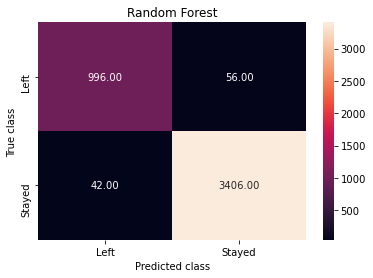

In [190]:
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')


In [191]:
print(classification_report(y_test, logreg.predict(X_test)))


              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3462
           1       0.51      0.26      0.35      1038

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.60      4500
weighted avg       0.74      0.77      0.74      4500



D:\Software\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


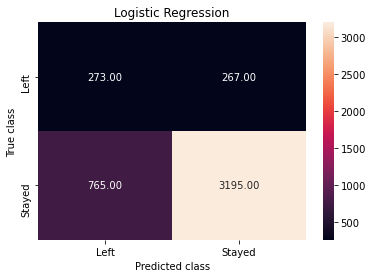

In [192]:
logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test, [1,0])
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')


In [193]:
print(classification_report(y_test, svc.predict(X_test)))


              precision    recall  f1-score   support

           0       0.95      0.92      0.94      3462
           1       0.77      0.85      0.81      1038

    accuracy                           0.91      4500
   macro avg       0.86      0.89      0.87      4500
weighted avg       0.91      0.91      0.91      4500



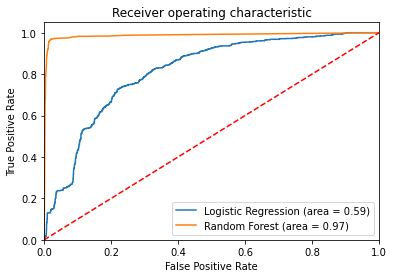

In [194]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()


In [195]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))


promotion_last_5years-0.25%
department_management-0.26%
department_hr-0.30%
department_RandD-0.31%
salary_high-0.69%
salary_low-1.30%
Work_accident-1.47%
last_evaluation-19.11%
time_spend_company-26.76%
satisfaction_level-49.54%
